https://machinelearningmastery.com/lstm-autoencoders/

In [1]:
# LSTM Autoencoder predict sequence
from numpy import array

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.utils import plot_model

In [2]:
# Define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [3]:
# Reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))

In [4]:
# Prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1

In [5]:
# Define encoder
visible = Input(shape=(n_in,1))
encoder = LSTM(100, activation='relu')(visible)

In [6]:
# Define reconstruct decoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)

In [7]:
# Define predict decoder
decoder2 = RepeatVector(n_out)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)

In [8]:
# Tie them together
model = Model(inputs=visible, outputs=[decoder1, decoder2])

In [9]:
model.compile(optimizer='adam', loss='mse')

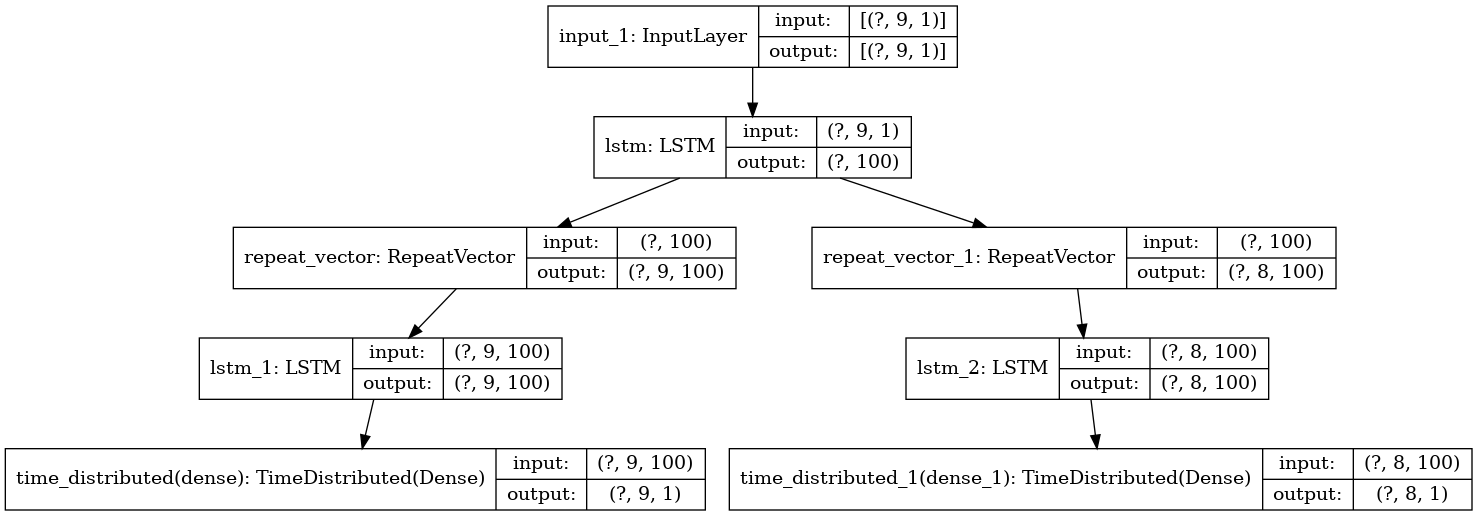

In [10]:
plot_model(model, show_shapes=True, to_file='composite_lstm_autoencoder.png')

In [11]:
# Fit model
model.fit(seq_in, [seq_in, seq_out], epochs=3000, verbose=0)

In [12]:
# Demonstrate recreation
yhat = model.predict(seq_in, verbose=0)
print(yhat)

[array([[[0.10037354],
        [0.1996622 ],
        [0.29983085],
        [0.40005136],
        [0.5001135 ],
        [0.60000545],
        [0.69986886],
        [0.7999338 ],
        [0.899929  ]]], dtype=float32), array([[[0.19620559],
        [0.3015689 ],
        [0.40265363],
        [0.5013609 ],
        [0.5992831 ],
        [0.6978173 ],
        [0.7982745 ],
        [0.9019668 ]]], dtype=float32)]
